In [443]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [444]:
def extract_image(image, points):
    (x1, y1), (x2, y2) = points

    roi = image[y1:y2, x1:x2]

    return roi

In [445]:
def iou(u, v, shape):
    height, width = shape
    if np.abs((u[0] - v[0])) > width or np.abs((u[1] - v[1])) > height:
        return 0
    else:
        i_width = width - np.abs((u[0] - v[0]))
        i_height = height - np.abs((u[1] - v[1]))
        return (i_width * i_height) / ((width * height) * 2 - (i_width * i_height))

In [446]:
class TemplateMatching():
    def __init__(self, points, path):
        self.points = points
        self.path = path

        self.image_viz = cv2.imread(path)
        self.obj_viz = extract_image(self.image_viz, points)

        self.image = cv2.imread(path)[:,:,2]
        cv2.imwrite('object.png', self.obj_viz)
        self.obj = cv2.imread('object.png')[:,:,2]
        self.locs = []

    def visualize(self):
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(self.image_viz, cv2.COLOR_BGR2RGB))

    def template_matching_algo(self, threshold=0.027, method=cv2.TM_SQDIFF_NORMED):
        img2 = self.image.copy()
        tem = self.obj.copy()

        # template matching
        result = cv2.matchTemplate(img2, tem, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        for i in range(result.shape[0]):
            for j in range(result.shape[1]):
                if result[i, j] < threshold:
                    self.locs.append((j, i))
        count = 1
        for loc in self.locs:
            bottom_right = (loc[0] + tem.shape[1], loc[1] + tem.shape[0])
            cv2.rectangle(self.image_viz, loc, bottom_right, (0, 0, 0), 2)
            cv2.putText(self.image_viz, str(count), (loc[0], loc[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
            count += 1

    # Filter out duplicate matched regions by measuring IoU (Intersection over Union)
    def filter(self):
        final_des = []
        tem = self.obj  # Template (object) to compare with

        print(f"Original locs (before filtering): {len(self.locs)} matches found.")

        # Filter locations based on IoU
        for u in self.locs:  # Use self.locs, which has all the match points
            if len(final_des) == 0:
                final_des.append(u)
            else:
                check = True
                for v in final_des:
                    overlap = iou(u, v, tem.shape)
                    if overlap > 0.5:  
                        check = False
                if check:
                    final_des.append(u)

        print(f"Filtered locs (after IoU filtering): {len(final_des)} unique matches found.")

        count = 1
        img3 = cv2.imread(self.path)
        for loc in final_des:  # Only draw filtered matches
            bottom_right = (loc[0] + tem.shape[1], loc[1] + tem.shape[0])
            cv2.rectangle(img3, loc, bottom_right, (0, 0, 0), 2)
            cv2.putText(img3, str(count), (loc[0], loc[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
            count += 1

        plt.figure(figsize=(10, 10), dpi=80)
        plt.imshow(img3[:, :, ::-1])
        plt.show()



Original locs (before filtering): 103 matches found.
Filtered locs (after IoU filtering): 14 unique matches found.


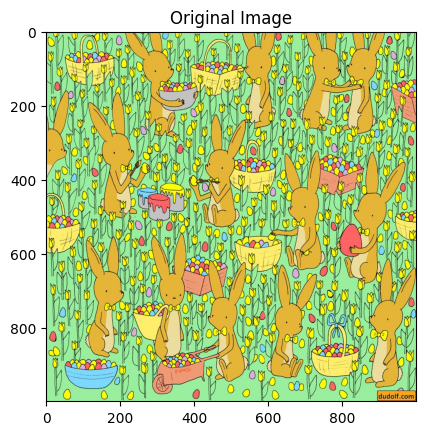

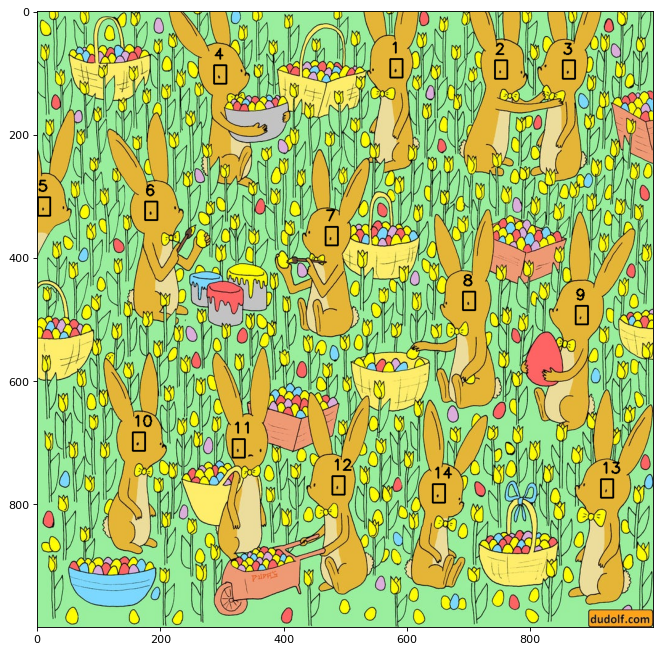

In [447]:
path = 'rabbit.jpeg'
points = [(155, 685), (175, 715)]

template_matching = TemplateMatching(points, path)

template_matching.visualize()

template_matching.template_matching_algo(threshold=0.01)
template_matching.filter()

Original locs (before filtering): 74 matches found.
Filtered locs (after IoU filtering): 55 unique matches found.


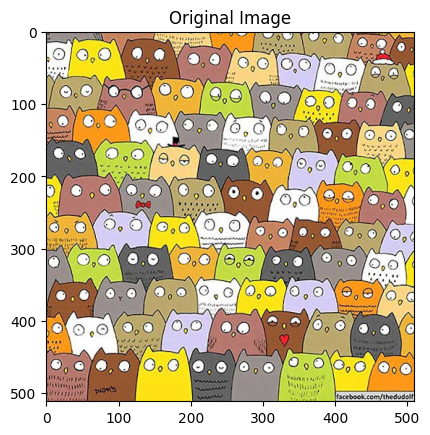

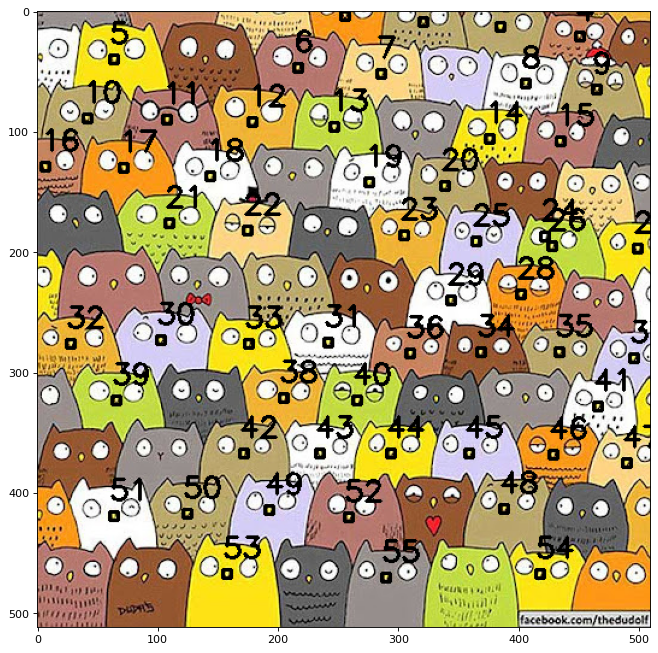

In [449]:

path = 'cat.jpg'
points = [ (238, 272), (245, 279)]

template_matching = TemplateMatching(points, path)

template_matching.visualize()

template_matching.template_matching_algo(threshold=0.183)
template_matching.filter()

Original locs (before filtering): 125 matches found.
Filtered locs (after IoU filtering): 58 unique matches found.


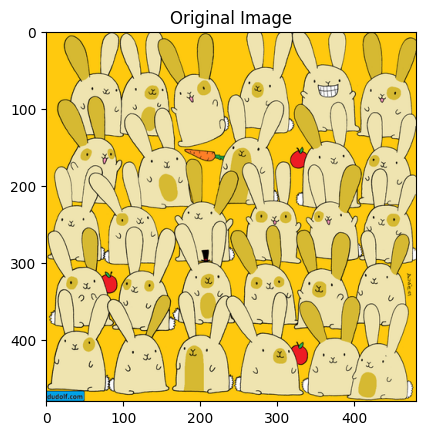

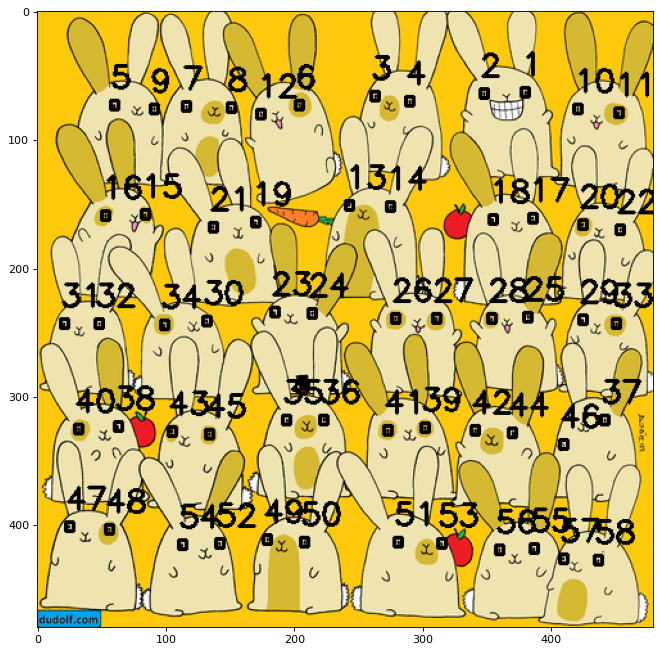

In [450]:

path = 'rabbit2.png'
points = [(134, 165), (140, 172)]

template_matching = TemplateMatching(points, path)

template_matching.visualize()

template_matching.template_matching_algo(threshold=0.066)
template_matching.filter()

Original locs (before filtering): 22 matches found.
Filtered locs (after IoU filtering): 7 unique matches found.


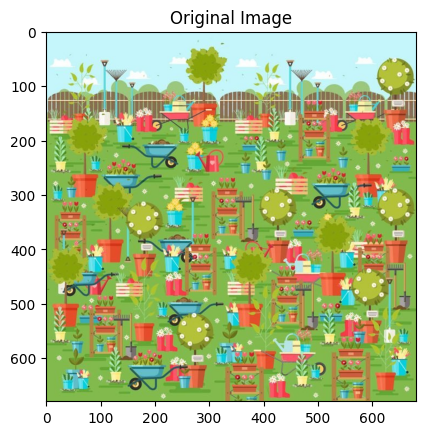

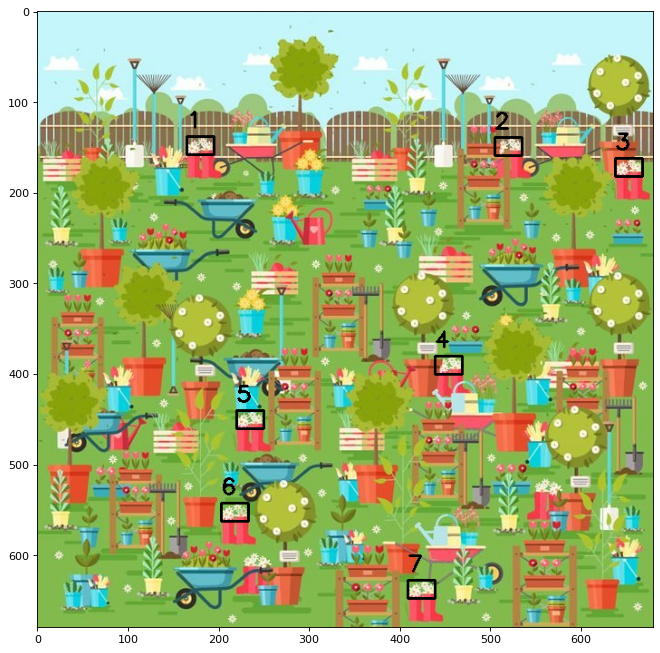

In [451]:
path = 'pair_boot.jpg'
points = [(165, 140), (195, 160)]

template_matching = TemplateMatching(points, path)

template_matching.visualize()

template_matching.template_matching_algo(threshold=0.031)
template_matching.filter()

Original locs (before filtering): 11 matches found.
Filtered locs (after IoU filtering): 5 unique matches found.


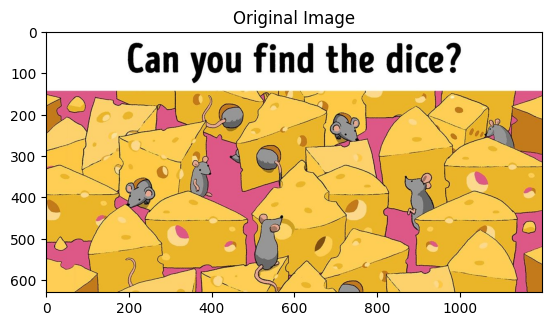

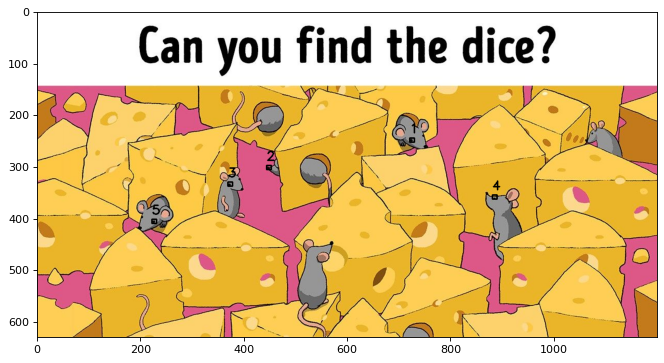

In [452]:
path = 'mouse.jpg'
points = [(444, 299), (453, 307)]

template_matching = TemplateMatching(points, path)

template_matching.visualize()

template_matching.template_matching_algo(threshold=0.2)
template_matching.filter()